# Connecting to Google Drive

In [0]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# Dataset EDA

##Train Set

In [0]:
import pandas as pd
import numpy as np

In [0]:
#read data
df = pd.read_csv('/content/drive/My Drive/Multi_Agent Dataset/train.csv',sep=',')
print('Total rows: ', len(df))
#df.head(10)
validation = pd.read_csv('/content/drive/My Drive/Multi_Agent Dataset/validation.csv',sep=',')[0:5000]
df.head(10)

Total rows:  2430981


,click,weekday,hour,bidid,userid,useragent,IP,region,city,adexchange,...,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,0,5,22,b7bea80521fdecd95d2d761a38c91c3f09618066,2e880fb7d690cf7377b2e42e701728e3f3c0e4c1,windows_ie,125.37.175.*,2,2,2.0,...,200,2,0,5,a4f763f78ef3eedfe614263b94a8924e,238,5,0f951a030abdaedd733ee8d114ce2944,3427,NaN
1,0,1,20,4f51205475678f5a124bc76b2c54163bf8eaa7eb,3a1fe01360ff8100e7d006b83b77a3e4c01d928c,windows_chrome,171.36.92.*,238,239,1.0,...,250,FourthView,Na,0,10722,294,23,NaN,2821,NaN
2,0,3,13,b604e3fd054a658ab7ced4285ebf2ef54d2bd890,801d18a056b6fe6b06a794aef17fb0d6daff2414,windows_ie,59.46.106.*,40,41,2.0,...,250,2,0,5,798b2d49952d77f1eace9f23c210d0b5,238,24,0f951a030abdaedd733ee8d114ce2944,3427,"10052,10006,13866,10110"
3,0,6,23,0348beeae93e561584c3b50fc9e7746a33048ad7,0d6eaf2259699990e38a1fc5116f112070b9ecdc,windows_ie,114.250.226.*,1,1,1.0,...,600,2,1,0,cb7c76e7784031272e37af8e7e9b062c,300,25,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10063,10111"
4,0,5,6,268149c1789bce2bc9798ffd97ec431219bafeb3,a239d9bb642460d974ba67f85e63b8d3e214da0e,windows_ie,183.63.192.*,216,233,2.0,...,90,OtherView,Na,133,7330,277,133,NaN,2259,NaN
5,0,4,17,1be2cf4a47a2a6aee4b0fa64d1b786d3897be4f0,8810fd690f88ddfb797867e3e08e7816f274bd46,windows_ie,119.45.182.*,276,277,1.0,...,280,2,1,0,77819d3e0b3467fe5c7b16d68ad923a1,300,123,bebefa5efe83beee17a3d245e7c5085b,1458,"10006,10077,10063,10057,10110"
6,0,3,12,6b4f23dd215a5f11136c2f29214236cfee1f0122,fbd1bcaf2b33108d2c7f88ac41f0b0194b508a9b,windows_ie,112.82.93.*,80,89,3.0,...,90,0,0,20,86c2543527c86a893d4d4f68810a0416,300,20,43f4a37f42a7c5e6219e2601b26c6976,3386,"10083,10024,10063,13496,10093,10006,10057,10110"
7,0,3,16,f7c1d8ea177211249456c79e194617ce107bc077,9b539ba886146562a3991fd9f94bb9f9bad1f647,windows_ie,118.75.92.*,15,19,1.0,...,600,2,1,0,cb7c76e7784031272e37af8e7e9b062c,300,134,bebefa5efe83beee17a3d245e7c5085b,1458,"10063,10024,13800,13866,10006,10111"
8,0,5,14,9e97694096fe8692851048a893231a7f7ff87922,ddc9c85b6a5726aafaa4c42239e90fb7a44a88d7,windows_ie,61.185.128.*,333,342,3.0,...,90,0,0,70,832b91d59d0cb5731431653204a76c0e,300,70,bebefa5efe83beee17a3d245e7c5085b,1458,"10063,10006,10083,10110"
9,0,5,0,d1b7c7fdb88ce3aa78a540bb29848dd77329a574,63b4f9a3638f81af361ab3c4190fd3e1b5e70fea,windows_chrome,117.9.211.*,2,2,3.0,...,90,0,0,70,a10c31a8ff5f42930b4c34035e523886,241,77,d29e59bf0f7f8243858b8183f14d4412,3358,"13403,10031,10063,10083,10006,10077,10075,10110"


## Data Processing-split original datafram in to several sub-dataframe according to their advitor

In [0]:
advertisers = df['advertiser'].drop_duplicates().tolist()#retrive all advertiser into a list
print(advertisers)
sub_dataframes = []#list used to store sub data frame
column_list = []
for column in df:
  column_list.append(column)
for advertiser in advertisers:
  sub_dataframes.append(df[(df['advertiser'] == advertiser)])
for sub_df in sub_dataframes:
  print(sub_df.info())

[3427, 2821, 1458, 2259, 3386, 3358, 3476, 2261, 2997]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 402806 entries, 0 to 2430977
Data columns (total 25 columns):
click             402806 non-null int64
weekday           402806 non-null int64
hour              402806 non-null int64
bidid             402806 non-null object
userid            402806 non-null object
useragent         402806 non-null object
IP                402806 non-null object
region            402806 non-null int64
city              402806 non-null int64
adexchange        402806 non-null float64
domain            384560 non-null object
url               400440 non-null object
urlid             0 non-null float64
slotid            402806 non-null object
slotwidth         402806 non-null int64
slotheight        402806 non-null int64
slotvisibility    402806 non-null object
slotformat        402806 non-null object
slotprice         402806 non-null int64
creative          402806 non-null object
bidprice          402806

In [0]:

#statistics
sum_of_clicks_list = []
num_of_bids_list = []
num_of_impression_list = []
cost_list = []
for dataframes in sub_dataframes:
  #sum of clicks
  sum_of_clicks = dataframes['click'].sum()
  sum_of_clicks_list.append(sum_of_clicks)
  #number of bids
  num_of_bids = len(dataframes)
  num_of_bids_list.append(num_of_bids)
  #number of impression
  num_of_impression = len(dataframes[(dataframes['bidprice'] >= dataframes['payprice'])])
  num_of_impression_list.append(num_of_impression)
  #print(dataframes[(dataframes['bidprice'] >= dataframes['payprice'])][:50][['bidprice','payprice']])
  #cost
  cost = dataframes['payprice'].sum()
  cost_list.append(cost)
print(sum_of_clicks_list)
print(num_of_bids_list)      
print(num_of_impression_list)
print(cost_list)

[272, 131, 385, 43, 320, 202, 187, 36, 217]
[402806, 211366, 492353, 133673, 455041, 264956, 310835, 110122, 49829]
[402806, 211366, 492353, 133673, 455041, 264956, 310835, 110122, 49829]
[30458711, 18828044, 33968736, 12428238, 34931823, 22447231, 23918779, 9873779, 3129267]


##Win Ratio

In [0]:
#Win Ration = number of impression/ number of bids
WR = list(map(lambda x: x[0]/x[1]*100, zip(num_of_impression_list, num_of_bids_list)))
print(WR)

[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]


##CTR

In [0]:
#CTR = click/impression
CTR = list(map(lambda x: x[0]/x[1]*100, zip(sum_of_clicks_list, num_of_impression_list)))
print(CTR)

[0.06752630298456329, 0.061977801538563436, 0.07819592853095239, 0.03216805188781579, 0.07032333350181633, 0.07623907365751295, 0.06016053533225023, 0.032691015419262275, 0.43548937365791]


##CPM

In [0]:
#Cost per mille = cost/impressions*1000, In this cast the units of cost is already CPM so do not multiply 1000
CPM = list(map(lambda x: x[0]/x[1], zip(cost_list, num_of_impression_list)))
print(CPM)

[75.61632895239892, 89.07792170926261, 68.99264552059194, 92.9749313623544, 76.7663199579818, 84.72059889189148, 76.95008284137887, 89.66218375983, 62.800116398081435]


##eCPC

In [0]:
#estimate cost per click = cost/click
eCPC = list(map(lambda x: x[0]/(x[1]), zip(cost_list, sum_of_clicks_list)))
print(eCPC)

[111980.55514705883, 143725.52671755725, 88230.48311688312, 289028.79069767444, 109161.946875, 111124.90594059406, 127907.90909090909, 274271.6388888889, 14420.585253456222]


##Plots

In [0]:
import matplotlib.pyplot as plt
import seaborn

In [0]:
useragent = df['useragent'].drop_duplicates().tolist()
print(useragent)
click_impression_list = []
for dataframes in sub_dataframes:
  tuple_list = []
  click_mac = 0
  click_windows = 0
  click_android = 0
  click_linux = 0
  click_ios = 0
  click_other = 0
  imp_mac = 0
  imp_windows = 0
  imp_android = 0
  imp_linux = 0
  imp_ios = 0
  imp_other = 0
  for ua in useragent:
    useragent_dataframes = dataframes[dataframes['useragent'] == ua]
    #print(ua,len(useragent_dataframes))
    sum_click = useragent_dataframes['click'].sum()
    sum_impression = len(useragent_dataframes[(useragent_dataframes['bidprice'] >= useragent_dataframes['payprice'])])
    if ua.split('_')[0] == 'mac':
      click_mac += sum_click
      imp_mac += sum_impression
    elif ua.split('_')[0] == 'windows':
      click_windows += sum_click
      imp_windows += sum_impression
    elif ua.split('_')[0] == 'android':
      click_android += sum_click
      imp_android += sum_impression
    elif ua.split('_')[0] == 'linux':
      click_linux += sum_click
      imp_linux += sum_impression
    elif ua.split('_')[0] == 'ios':
      click_ios += sum_click
      imp_ios += sum_impression
    else:
      click_other += sum_click
      imp_other += sum_impression
  tuple_list.append((click_mac, imp_mac))
  tuple_list.append((click_windows, imp_windows))
  tuple_list.append((click_android, imp_android))
  tuple_list.append((click_linux, imp_linux))
  tuple_list.append((click_ios, imp_ios))
  tuple_list.append((click_other, imp_other))    
  click_impression_list.append(tuple_list)
print(click_impression_list)




['windows_ie', 'windows_chrome', 'mac_other', 'windows_other', 'android_safari', 'mac_safari', 'windows_maxthon', 'windows_firefox', 'mac_chrome', 'linux_firefox', 'windows_opera', 'windows_theworld', 'android_other', 'windows_safari', 'ios_safari', 'linux_other', 'mac_firefox', 'android_opera', 'mac_maxthon', 'other_other', 'android_chrome', 'linux_chrome', 'other_opera', 'linux_safari', 'other_ie', 'ios_other', 'linux_opera', 'android_sogou', 'other_safari', 'windows_sogou', 'mac_opera', 'mac_sogou', 'android_maxthon', 'android_firefox', 'linux_ie', 'other_chrome', 'android_ie', 'other_firefox']
[[(22, 7518), (221, 392486), (26, 2309), (2, 252), (1, 44), (0, 197)], [(9, 5043), (115, 204086), (6, 1866), (0, 191), (1, 56), (0, 124)], [(32, 10357), (338, 477725), (14, 3185), (0, 268), (1, 79), (0, 739)], [(0, 1657), (41, 131640), (1, 197), (1, 72), (0, 9), (0, 98)], [(39, 8232), (254, 443822), (26, 2402), (0, 260), (0, 86), (1, 239)], [(38, 9610), (145, 251093), (18, 3800), (1, 198), (0

##Advertiser VS Click

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0, 0.5, 'CTR')

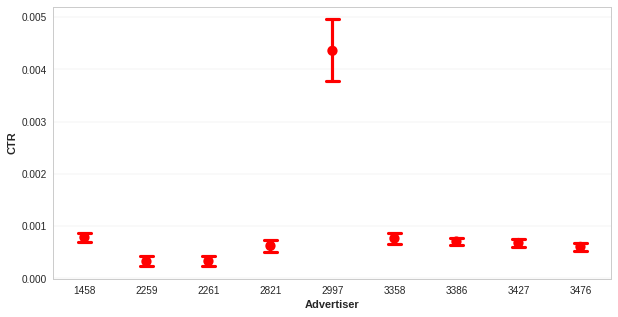

In [0]:
seaborn.set(style='whitegrid', rc={"grid.linewidth": 0.2})
fig = plt.figure(figsize=(10,5))
ax = seaborn.pointplot(x = "advertiser", y = "click", data = df, color = "red", capsize = 0.2, join = False)
#ax.set(xlabel = 'Advertiser', ylabel = 'CTR')
ax.set_xlabel('Advertiser', fontweight = 'bold')
ax.set_ylabel('CTR', fontweight = 'bold')

##Hour VS Click

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0, 0.5, 'CTR')

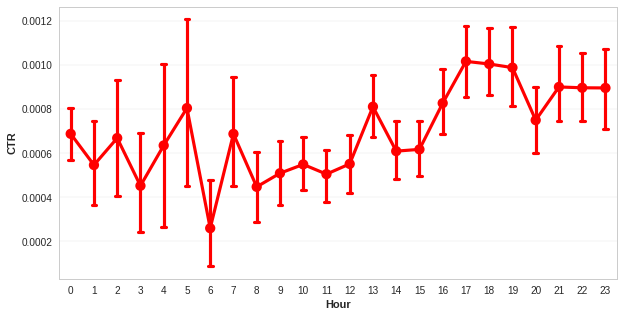

In [0]:
seaborn.set(style='whitegrid', rc={"grid.linewidth": 0.2})
fig = plt.figure(figsize=(10,5))
ax = seaborn.pointplot(x = "hour", y = "click", data = df, color = "red", capsize = 0.2)
#ax.set(xlabel = 'Advertiser', ylabel = 'CTR')
ax.set_xlabel('Hour', fontweight = 'bold')
ax.set_ylabel('CTR', fontweight = 'bold')

##Weekdays VS Click

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0, 0.5, 'CTR')

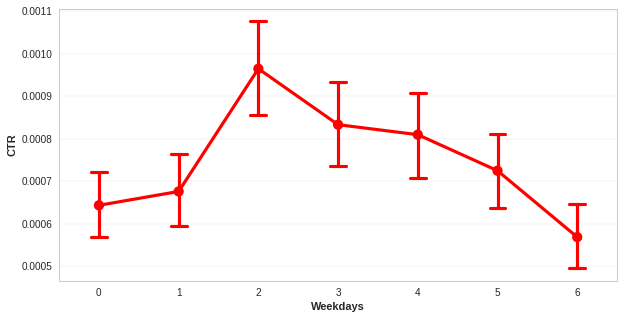

In [0]:
seaborn.set(style='whitegrid', rc={"grid.linewidth": 0.2})
fig = plt.figure(figsize=(10,5))
ax = seaborn.pointplot(x = "weekday", y = "click", data = df, color = "red", capsize = 0.2)
#for sub_dataframe in sub_dataframes[:3]:
#  seaborn.pointplot(x = "weekday", y = "click", data = sub_dataframe, capsize = 0.1)
ax.set_xlabel('Weekdays', fontweight = 'bold')
ax.set_ylabel('CTR', fontweight = 'bold')

##Region VS Click

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0, 0.5, 'CTR')

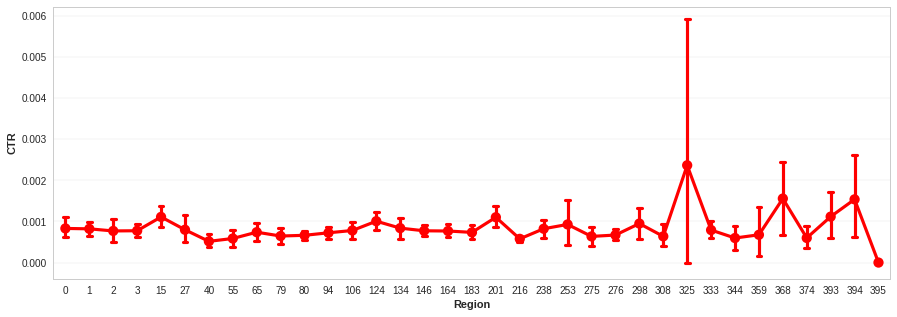

In [0]:
seaborn.set(style='whitegrid', rc={"grid.linewidth": 0.2})
fig = plt.figure(figsize=(15,5))
ax = seaborn.pointplot(x = "region", y = "click", data = df, color = "red", capsize = 0.2)
#for sub_dataframe in sub_dataframes[:3]:
#  seaborn.pointplot(x = "weekday", y = "click", data = sub_dataframe, capsize = 0.1)
ax.set_xlabel('Region', fontweight = 'bold')
ax.set_ylabel('CTR', fontweight = 'bold')

##Slot Size

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0, 0.5, 'CTR')

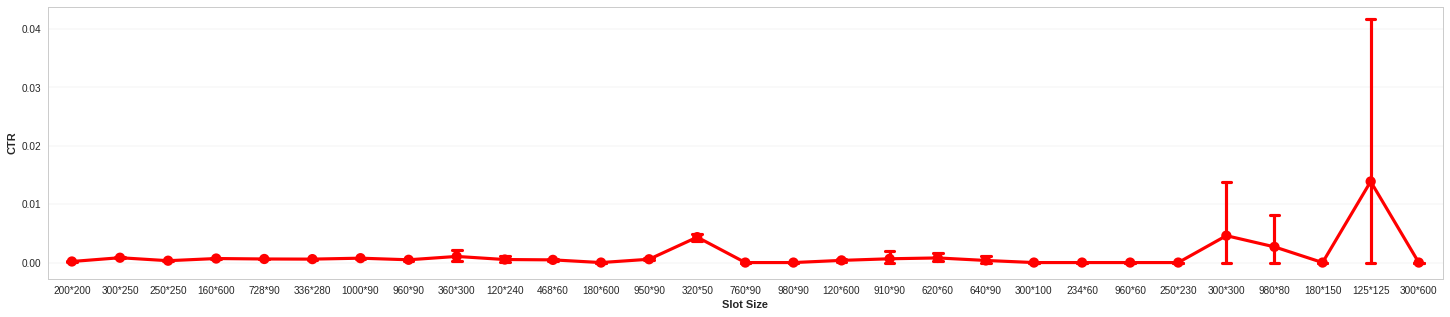

In [0]:
df_width = df['slotwidth'].astype('str')
df_height = df['slotheight'].astype('str')
df['slotsize'] = df_width.str.cat(df_height, sep = '*')

seaborn.set(style='whitegrid', rc={"grid.linewidth": 0.2})
fig = plt.figure(figsize=(25,5))
ax = seaborn.pointplot(x = "slotsize", y = "click", data = df, color = "red", capsize = 0.2)
#for sub_dataframe in sub_dataframes[:3]:
#  seaborn.pointplot(x = "weekday", y = "click", data = sub_dataframe, capsize = 0.1)
ax.set_xlabel('Slot Size', fontweight = 'bold')
ax.set_ylabel('CTR', fontweight = 'bold')


##AdExchange VS Click

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0, 0.5, 'CTR')

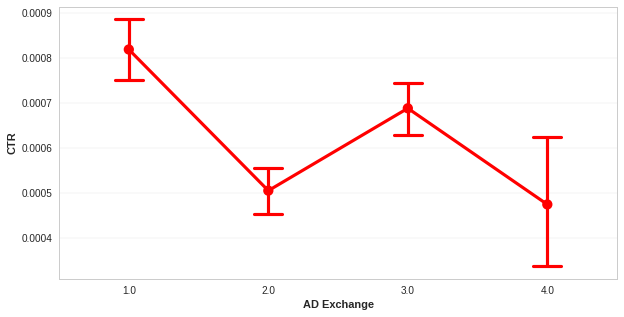

In [0]:
seaborn.set(style='whitegrid', rc={"grid.linewidth": 0.2})
fig = plt.figure(figsize=(10,5))
ax = seaborn.pointplot(x = "adexchange", y = "click", data = df, color = "red", capsize = 0.2)
#for sub_dataframe in sub_dataframes[:3]:
#  seaborn.pointplot(x = "weekday", y = "click", data = sub_dataframe, capsize = 0.1)
ax.set_xlabel('AD Exchange', fontweight = 'bold')
ax.set_ylabel('CTR', fontweight = 'bold')


##OS VS Click

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0, 0.5, 'CTR')

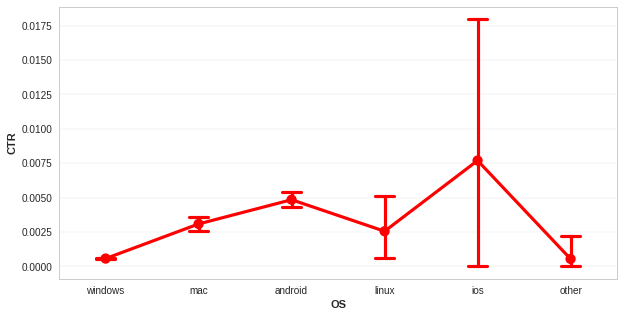

In [0]:
df['os'] = df['useragent'].str.split('_', expand = True)[0]

seaborn.set(style='whitegrid', rc={"grid.linewidth": 0.2})
fig = plt.figure(figsize=(10,5))
ax = seaborn.pointplot(x = "os", y = "click", data = df, color = "red", capsize = 0.2)
#for sub_dataframe in sub_dataframes[:3]:
#  seaborn.pointplot(x = "weekday", y = "click", data = sub_dataframe, capsize = 0.1)
ax.set_xlabel('OS', fontweight = 'bold')
ax.set_ylabel('CTR', fontweight = 'bold')

## Browser VS Click

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0, 0.5, 'CTR')

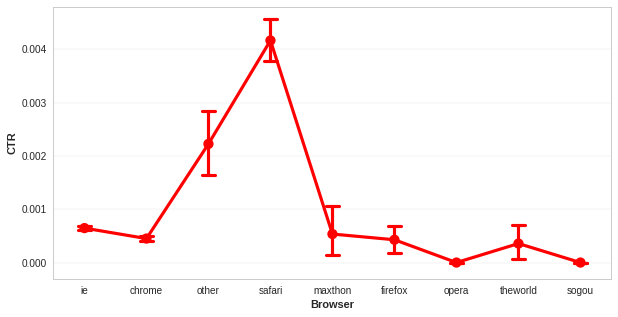

In [0]:
df['browser'] = df['useragent'].str.split('_', expand = True)[1]

seaborn.set(style='whitegrid', rc={"grid.linewidth": 0.2})
fig = plt.figure(figsize=(10,5))
ax = seaborn.pointplot(x = "browser", y = "click", data = df, color = "red", capsize = 0.2)
#for sub_dataframe in sub_dataframes[:3]:
#  seaborn.pointplot(x = "weekday", y = "click", data = sub_dataframe, capsize = 0.1)
ax.set_xlabel('Browser', fontweight = 'bold')
ax.set_ylabel('CTR', fontweight = 'bold')

##Test Set

In [0]:
#read data
df_test = pd.read_csv('/content/drive/My Drive/Multi_Agent Dataset/test.csv',sep=',')[0:5000]
print('Total rows: ', len(df_test))
df_test.head(10)

Total rows:  5000


,weekday,hour,bidid,userid,useragent,IP,region,city,adexchange,domain,...,slotid,slotwidth,slotheight,slotvisibility,slotformat,slotprice,creative,keypage,advertiser,usertag
0,0,12,366c563de7d90feb9d4dab53e795a93fb3157387,75045dd2f2136c93fe55fe6c446ec1527ed8f0bb,windows_chrome,27.197.36.*,146,159,3.0,DDTSQuf0MTTNaqKIvMpENpn,...,Astro_F_Rectangle,300,250,0,0,10,00fccc64a1ee2809348509b7ac2a97a5,b2e35064f3549d447edbbdfb1f707c8c,3427,"10024,10077,10075,10063,10031,10102,10006,1304..."
1,3,14,29167d4caa719788b5a342dbaa25151d53121f80,11279eb1f8f7a88f877db911673522b6ff202aa7,android_safari,124.126.227.*,1,1,NaN,d63d96468f66986d5a8eb5225ad0b6f0,...,2745306850,320,50,FirstView,Na,5,11908,NaN,2997,NaN
2,5,19,ff8bc3f4d44a3ea60c5f3a3a8fbe7cd98fb2966e,4771a819a3f5b86776d8a9456f4f2506578f78d8,windows_ie,116.116.104.*,27,34,1.0,trqRTJkrBoq7JsNr5SqfNX,...,mm_34022157_3445226_11175100,336,280,2,1,0,77819d3e0b3467fe5c7b16d68ad923a1,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10006,10024,10059,10048,10063,10067,1008..."
3,0,21,844c2da00d45315f20b748ec131c26ee99a7cbc7,5360671379f3204afa9cc0edd8fd2e2096cb09eb,windows_ie,115.46.145.*,238,245,4.0,6d27caf5a202ec085f80af7163ef7cb0,...,210842,960,90,FirstView,Na,30,10717,NaN,2821,"10075,13042,10006,10110,13776,10031,10063"
4,2,20,c6017f0ad0c44d7d0c9b62583ea863f28941c0ca,d791b5f6306b9d299f81daa5448ced7e5bfa010f,windows_ie,221.199.203.*,27,35,3.0,3FKElpuEMusyJqKbuKz,...,Fashion_F_Rectangle,300,250,0,0,50,44966cc8da1ed40c95d59e863c8c75f0,43f4a37f42a7c5e6219e2601b26c6976,3386,10063
5,0,19,7493c42f6d8f29d9f414b75c125ce3db40461ef9,aed0d83d9e06589a23e5f02a3e93389f815effc5,windows_ie,122.141.136.*,55,60,3.0,31xSTvprdN1RFt,...,Ent_F_Upright,300,250,0,0,50,a499988a822facd86dd0e8e4ffef8532,bebefa5efe83beee17a3d245e7c5085b,1458,"13496,10093,10057,13866,10063,10110"
6,4,15,819fb6958ea48b10430710d009c57d55a31debcb,1ff9310f6ba827e47af5a7021953a4b9116a6a40,windows_chrome,175.146.224.*,40,48,3.0,ersbQv1RdoTy1m58uG,...,ALLINONE_F_Width1,1000,90,0,0,70,c46090c887c257b61ab1fa11baee91d8,0f951a030abdaedd733ee8d114ce2944,3427,NaN
7,0,0,8660774f6c94e32dfbd46add8a9bc94df3c74130,9a69166c6c091acd1e3fca35f661104a0f756883,windows_ie,202.104.177.*,216,233,1.0,trqRTu1ojqN-gMKzwFnWvpdh,...,mm_10028331_120124_10852228,728,90,1,1,0,48f2e9ba15708c0146bda5e1dd653caa,bebefa5efe83beee17a3d245e7c5085b,1458,NaN
8,4,8,ccc4c75ae4fd33526e5ecdae482c45c1dabc94db,30f29e6da56d60e1a70922cf310df9a01a8c35e3,windows_ie,183.92.64.*,183,186,3.0,ersbQv1RdoTy1m58uG,...,ALLINONE_F_Width1,1000,90,0,0,70,a10c31a8ff5f42930b4c34035e523886,d29e59bf0f7f8243858b8183f14d4412,3358,"10063,10031,10083,10110"
9,1,10,d9a212303746d85553966e902a315ba8812dd138,413efa29cacb96550cc04c2df62e65f72f872812,windows_ie,36.40.65.*,333,334,2.0,trqRTud0B9c7gspy5SqW,...,2069535511,468,60,2,0,5,2f88fc9cf0141b5bbaf251cab07f4ce7,361e128affece850342293213691a043,3386,"10048,10052,13042,10059,10093,11944,10031,1340..."


In [0]:
for column in df_test:
  print(column)

weekday
hour
bidid
userid
useragent
IP
region
city
adexchange
domain
url
urlid
slotid
slotwidth
slotheight
slotvisibility
slotformat
slotprice
creative
keypage
advertiser
usertag
